**AT82.03: Machine Learning**
>  Student Name: Israt jahan nipa   
Student ID: st124984

# **A3: Predicting Car Price**
**Assignment 03**

In this assignment, you will continue using the Car  Price dataset but with the code from scratch we learned in the class. We shall implement more code on top of what we have, perform some experiments using ML flow, and lastly deploy your docker to our prepared virtual machine. 

* **Note**: You are ENCOURAGED to work with your friends, but DISCOURAGED to blindly copy other’s work. Both parties will be given 0. 
* **Note**: Comments should be provided suﬀiciently so we know you understand. Failure to do so can raise suspicion of possible copying/plagiarism. 
* **Note**: You will be graded upon (1) documentation, (2) experiment, (3) implementation. 
* **Note**: This is a two-weeks assignment, but start early. 
* **Deliverables**: The GitHub link containing the jupyter notebook, a README.md of the github, and the folder of your web application called ‘app’.

## Step 1. Import lib
Here we import the essential libraries that is needed to perform the operation of Loading data, EDA, Preprocessing, Feature Selection, Testing and Inference.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.26.4', '2.2.2', '0.13.2', '3.9.2')

In [13]:
%pip install mlflow
import mlflow
import os

Note: you may need to restart the kernel to use updated packages.


In [14]:
mlflow.__version__

'2.21.3'

Before performing the operation below to setup mlflow we run command: mlflow ui in the terminal to host mlflow in local server in this case hosted at http://127.0.0.1:5000, here it creates an experiment to track the operation with name predictprice-regularization.

## Step 2. Load data
To load the data we use Pandas which we have already imported above in the Import lib section.

In [15]:
df = pd.read_csv('Cars.csv')

Now we check the type, shape, describe, info, columns of the loaded dataframe

In [16]:
# Check the shape of your data
df.shape #provides information about the number of rows and columns in a DataFrame

(8128, 13)

There are 8128 rows and 13 columns in the dataframe

In [17]:
# Statistical info
df.describe() #returns description of the data in the DataFrame
#if the DataFrame contains numerical data, the description contains information such as count, mean, std, min, 25%, 50%, 75%, and max

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Currently we have only four features in the dataframne with numerical values. Hence, the describe is only returning us with the data description of those features.

In [18]:
# Check dtypes and non-null counts of your input data
df.info() #prints information about the DataFrame
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Here we can see that some of the features contain null values in it. Like mileage, engine, max_power, torque, seats. If these features are deemed important later during the EDA then we must perform some operation to replace the null values with mean, median or mode in the X_train and X_test dataset.

In [19]:
df.dtypes #returns a Series with the data type of each column
#You can check dtype either way from info or from dtype

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [20]:
df.dtypes.value_counts()

object     9
int64      3
float64    1
Name: count, dtype: int64

The above command provides us with an overview of the dataframe the total number of data types we have in the dataframe, This dataframe contains: 9 objects, 3 integers, and 1 float. 

In [21]:
# Check the column names
df.columns #returns the label of each column in the DataFrame

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [22]:
df.head() #shows the first five rows in a dataframe with heading

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Furthermore, looking at the dtypes, columns, head and info. We can guess from the domain knowledge about which features can have relation and affect prediction of the selling price. From this we can make an inference that features $\mathbf{X}$ like brand, year, km driven, fuel, seller type, transmission, owner, mileage, engine capacity, max power, and seats can affect our target selling price $\mathbf{y}$.

However, to be sure of this we must run EDA to understand the whole scenario of the data before choosing the features.

## Step 3. Exploratory Data Analysis (EDA)

EDA is an essential step to understand and inspect the data, to have a better comprehension about the nature of the given data.  

In EDA we perform label encoding, mapping, univariate and multivariate analysis to determine the probable features. In this section we perform, univariate analysis like: [countplot, distribution plot], and multivariate analysis like [boxplot, scatterplot, correlation matrix] which helps us to determine features.

In [23]:
#rename column name to brand
df.rename(columns = {'name':'brand'}, inplace = True)
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Here feature 'name' has been changed to 'brand'.

Now we perform some analysis and try to find some relation of the features with the target.

First let's see how many unique categorical values are there for the features in the dataframe

In [24]:
df['brand'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

**For the feature brand, take only the first word and remove the rest.**  
Since we have many brand names let us only take the first word and remove the rest.

In [25]:
#split the string and keep the first word then check for the unique values
df['brand'] = df['brand'].str.split().str[0]
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [26]:
df['brand'].iloc[50] #this is to check if the value in the brand has any trailing spaces or not

'Honda'

**Drop the feature torque, simply because Chaky’s company does not understand well about it.**

In [27]:
#drop the torque feature
df.drop('torque', axis='columns', inplace=True)
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

Now we have a dataframe as below

In [28]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


**2.1 Univariate analysis**

Single variable exploratory data anlaysis. This analysis provides basic properties and distribution of the variable within a dataset. This method includes observing the central tendency of the mean, median, and mode which indicates the central or typical value of the variable. This analysis also includes the range, variance, standard deviation, and interquartile range (IQR), which describes the spread or variability in the data. Precentiles and Quartiles provide the insight to the distribution of the data. We perform operations such as countplot, boxplot, frequency distribution and others to analyze and understand the single variable's characteristics, distribution, and quality.

Now we perform the univariate analysis (looking at one feature at a time). And trying to find the distribution of the feature, identification of outliers if any, understand data distribution, assess the data quality by revealing missing values, extreme values and any inconsistencies in the data.

**For Continuous Data**: It provides insights into the range, variability, and central tendency of the data.

**For Categorical Data**: It gives an overview of the distribution of different categories and the proportion of each category in the dataset.

Before we perform analyis we can see that some continuous data in the dataframe contains string values together with numeric data. Hence we perform some operations to clean this.

**For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).**  

_Hint: use df.mileage.str.split_

In [29]:
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

In [30]:
df['mileage'].iloc[40]

16.1

So here we have removed 'kmpl' from mileage

**For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol**

In [31]:
#drop rows where the 'fuel' is 'CNG' or 'LPG'
indexFuel = df[(df['fuel'] == 'CNG') | (df['fuel'] == 'LPG')].index 
df.drop(indexFuel, inplace=True)

**For the feature engine, remove “CC” and convert the column to numerical type (e.g., float).**

In [32]:
df['engine'] = df['engine'].str.split().str[0].astype('Int64')
df['engine'].iloc[40]

1497

**Do the same for max power.**

In [33]:
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
df['max_power'].iloc[40]

117.3

So, we removed bph from max_power here.

Now we can perform some univariate analysis.

<Axes: xlabel='brand', ylabel='count'>

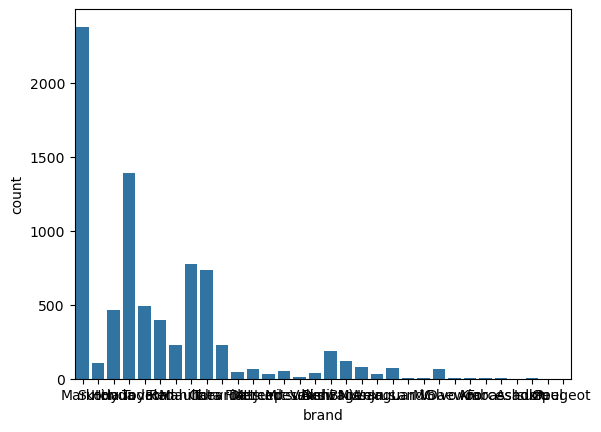

In [34]:
#countplot
sns.countplot(data = df, x='brand')

<Axes: xlabel='fuel', ylabel='count'>

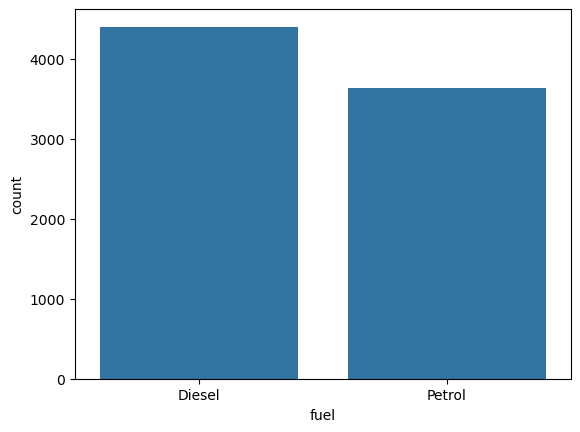

In [35]:
#countplot
sns.countplot(data = df, x='fuel')

<Axes: xlabel='seller_type', ylabel='count'>

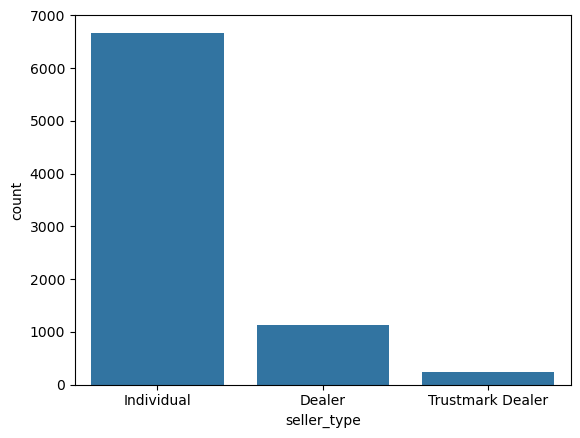

In [36]:
#count plot
sns.countplot(data=df, x='seller_type')

<Axes: xlabel='transmission', ylabel='count'>

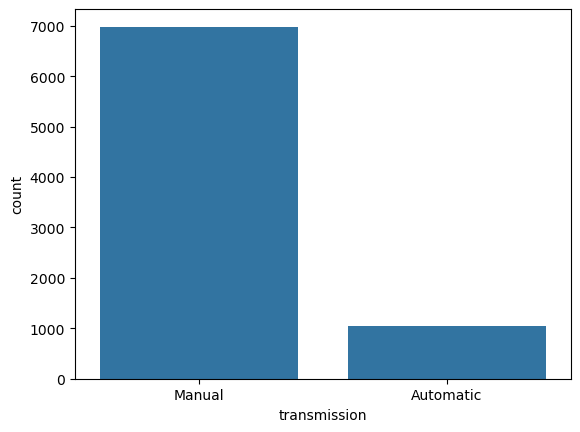

In [37]:
#count plot
sns.countplot(data=df, x='transmission')

<Axes: xlabel='owner', ylabel='count'>

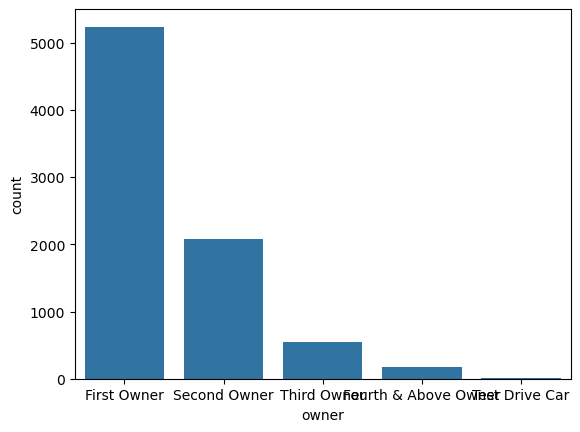

In [38]:
#count plot
sns.countplot(data=df, x='owner')

<Axes: xlabel='seats', ylabel='count'>

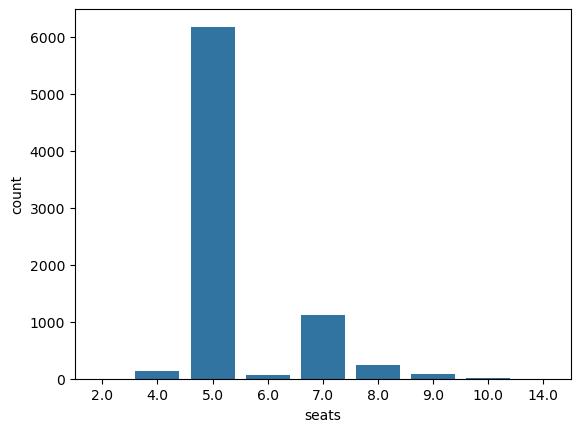

In [39]:
#count plot
sns.countplot(data=df, x='seats')

By performing the count plots in the frequency distribution of categorical variables we are trying to identify if there exists any class imbalances, and detect any rare categories and trends.

Here we came to find out features like brand, seller type, transmission, owner, and seats because of their fequency distribution can result in class imbalance if used for modelling. So, if these categories are to be used then we need to perform some operations like Label encoding or one hot encoding.

We must have some domain knowledge for this so that we can choose features as such.

Fuel type: Disel and Petrol on the other hand shows an almost equal number however some less amount in vehicles operated from petrol. We need further analysis if we can assume fuel as a feature or not.

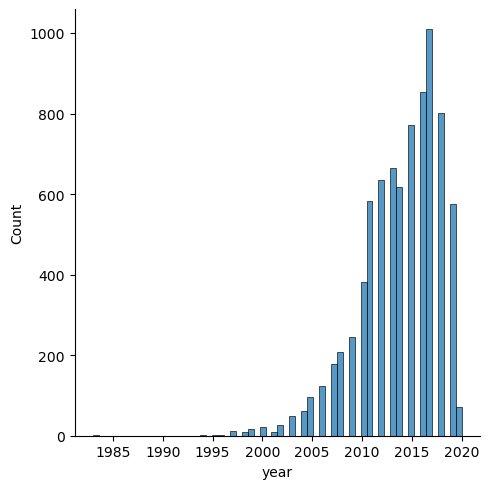

In [40]:
#distribution plot
sns.displot(data=df, x='year')

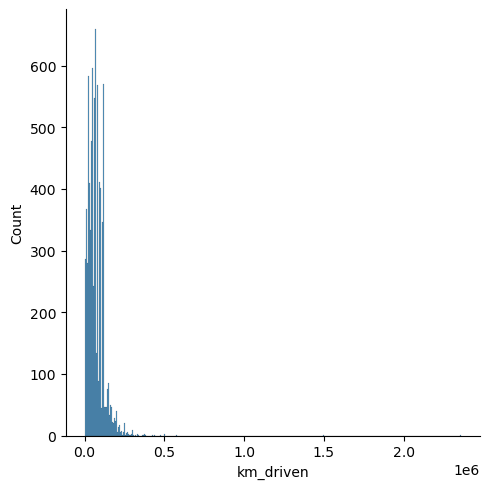

In [41]:
#distribution plot
sns.displot(data=df, x='km_driven')

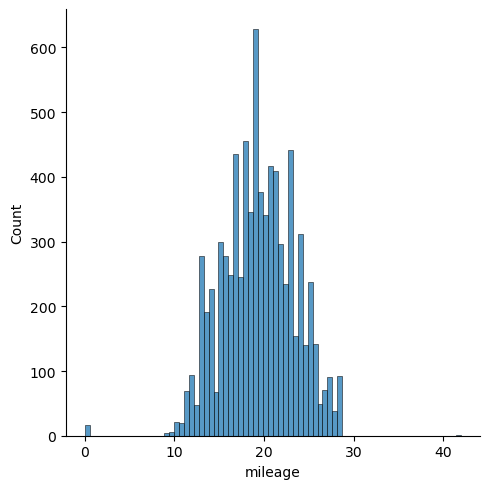

In [42]:
#distribution plot
sns.displot(data=df, x='mileage')

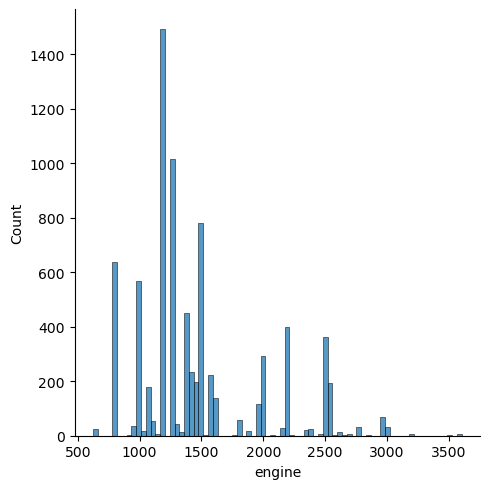

In [43]:
#distribution plot
sns.displot(data=df, x='engine')

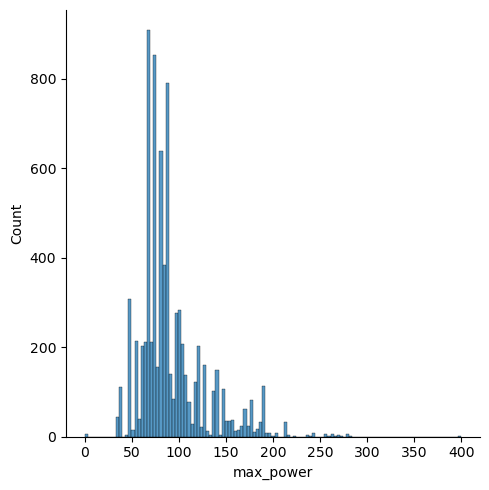

In [44]:
#distribution plot
sns.displot(data=df, x='max_power')

Distribution plot helps to understand the underlying pattern of data, such as its shape, spread, and central tendency. This plot is mostly used in context of continuous data.

Here in this dataset we are trying to infer the shape (Normal, Skewness, bi or multimodal distribution), central tendency, spread of data, and if presence of any outliers.

**year** depicts a distribution plot indicating that there is more data from the recent year as the graph skew more towards the left indicating more data points are clustered to the right. 

**km_driven** is more skewed towards right indicating more data points are clustered to the left. 

**mileage** depicts a central tendency with some outliers. It typically shows of a normal distribution of data.

**engine** on the other hand shows a spread of data with a wider disrtibution indicating higher variablity in the data. However, much of the data here also seemes to be to the left side.

**max_power** feature is more skewed towards right indicating more data points are clustered to the left. We can also see some outliers in max_power.

**2.2 Multivariate analysis**

Multiple variable exploratory data analysis. This involves involves examining more than two variables simultaneously to understand relationships and patterns within the data.

<Axes: xlabel='mileage', ylabel='selling_price'>

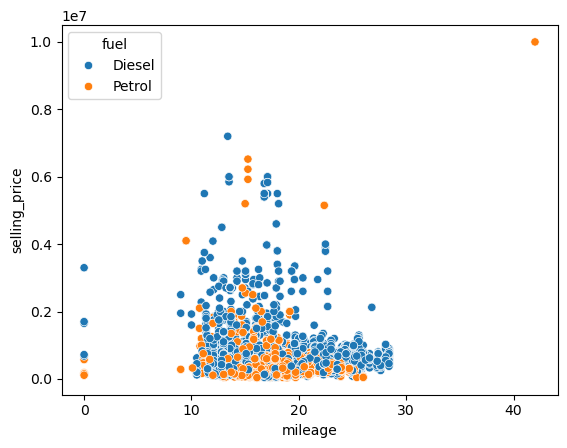

In [45]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='max_power', ylabel='selling_price'>

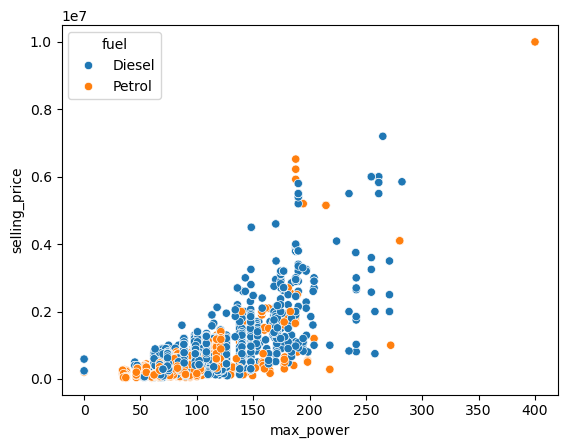

In [46]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='selling_price'>

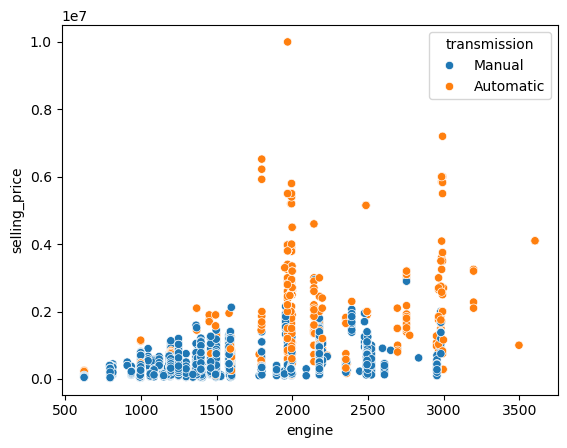

In [47]:
sns.scatterplot(x = df['engine'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='engine', ylabel='max_power'>

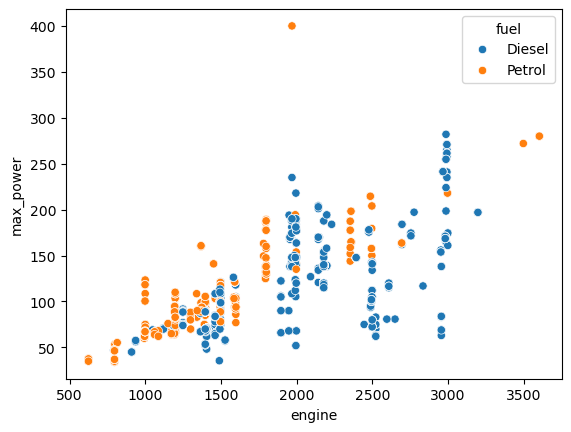

In [48]:
sns.scatterplot(x=df['engine'], y=df['max_power'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='mileage'>

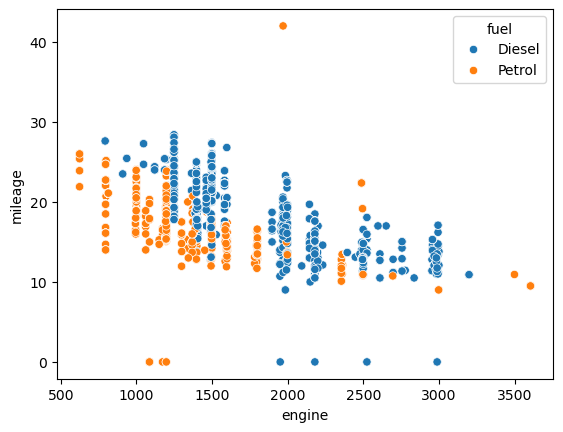

In [49]:
sns.scatterplot(x=df['engine'], y=df['mileage'], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='max_power'>

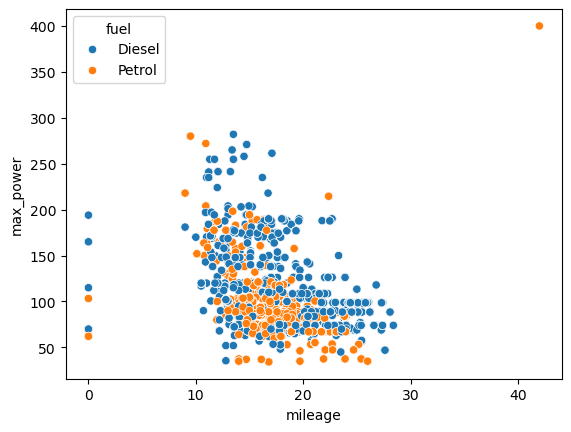

In [50]:
sns.scatterplot(x=df['mileage'], y=df['max_power'], hue=df['fuel'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

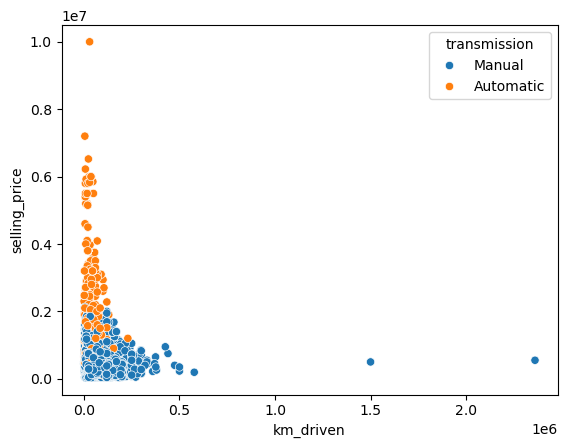

In [51]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'], hue=df['transmission'])

<Axes: xlabel='owner', ylabel='selling_price'>

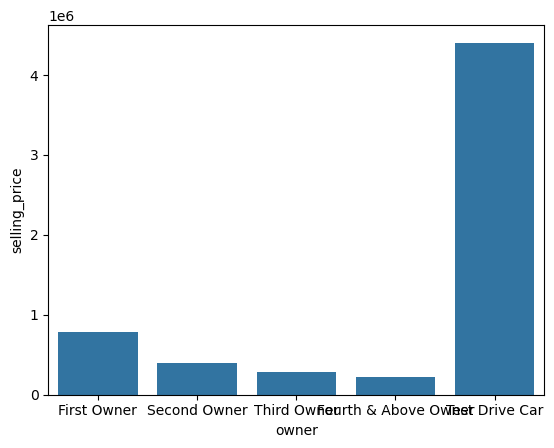

In [52]:
sns.barplot(x=df['owner'], y=df['selling_price'], errorbar=None)

Text(0.5, 0, 'Owner')

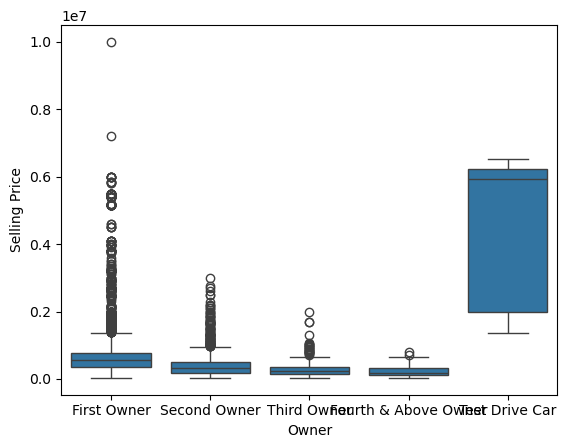

In [53]:
#compare selling price of cars according to owner
sns.boxplot(x = df['owner'], y = df['selling_price'])
plt.ylabel("Selling Price")
plt.xlabel("Owner")

<Axes: xlabel='year', ylabel='selling_price'>

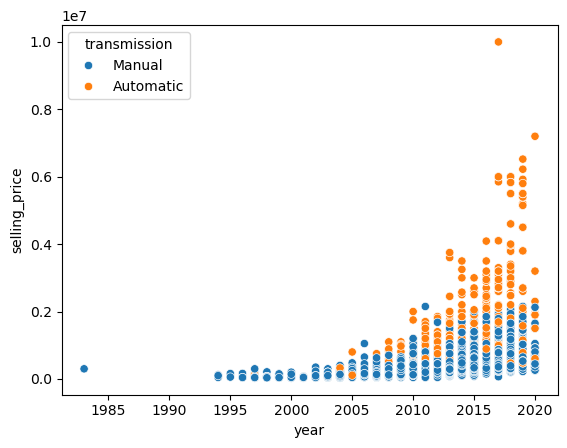

In [54]:
sns.scatterplot(x=df['year'], y=df['selling_price'], hue=df['transmission'])

From the scatter plots, bar plots and box plots performed above we can infer some idea about the relationship between the different variables. We can see a clear realtion between some independent variables and also the relation of independent variables with the dependent variable. When we plot dependent variable with few independent variable like max_power, engine, and year we are getting positive correlation, whereas in case of km_driven we are experiencing a negative correlation to the dependent variable.

Some the datapoints are either clustered together or scattered suggesting no correlation. We also performed to check correlation between some independent variable to see how they interact and relate to eachother. In this we found that as engine size increases the mileage decreases relatively, and as engine size increases max_power also increases.

We also encountered some outliers in the data however the outliers seems negligible due to its low frequency.

**Correlation Matrix**

Let's use correlation matrix to identify relationship between multiple variables in a dataset. Also we need to check whether certain features show multicollinearity.

<Axes: >

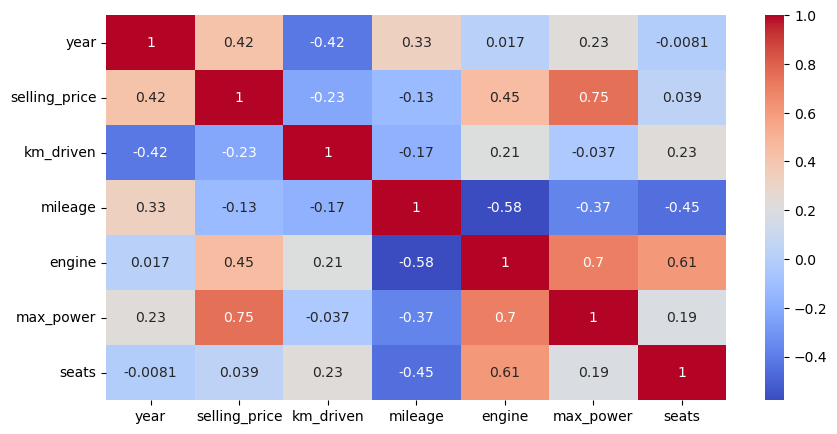

In [55]:
plt.figure(figsize = (10,5))
heatdata = df.corr(numeric_only=True)
sns.heatmap(heatdata, annot=True, cmap="coolwarm")

**Predictive Power Scoring (PPS)**

From the  the analysis performed in EDA we can infer that features such as year, km_driven, max_power, and engine shows a significant role in the increase or decrease of the selling price. However, we can also see the multicollinearity between engine and max_power and both features show postive correlation with selling price. 

=================================================================================

One more thing we observed in the analysis above is of the unusal price for the Test Drive Cars. Hence, we perform the operations below as suggested in the assignment for this.

**For the feature owner, map First owner to 1, ..., Test Drive Car to 5**

Now we would like to change "First owner", "Second owner", "Third owner", "Fourth And Above owner" and "Test Drive Car" to [0, 1, 2, 3, 4, 5], since machine learning algorithms do not understand text. Also, correlation matrix and other similar computational tools require numerical values.

In [56]:
# Map owner to numeric values
owner = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(owner)

**You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.**

From the above boxplot we can see that Test Drive Cars are very expensive and since we do not want to involve this in we delete all samples related to it.

In [57]:
#drop rows where the 'owner' is '5' i.e. 'Test Drive Cars'
indexOwner = df[(df['owner'] == 5)].index 
df.drop(indexOwner, inplace=True)

df['owner'].unique()

array([1, 2, 3, 4])

### Final Data Table

In [58]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0


**Task 1. Classification** - Based on 02 - Multinomial Logistic
> Regression.ipynb, modify LogisticRegression() class as follows:
>
> •First, make sure you used the preprocessed version of the dataset
> that you have done in A1/A2. Following the preprocessed version,
> convert the label selling price into discrete variable by simply
> putting the price in a bucket of 0, 1, 2, 3, which will result in a
> 4-class classification problem. One possible function is to use
> pd.cut(), but feel free to use whatever methods to achieve this.
> 
> •In sklearn, there is a handy function called classificationreport. Here,
> we shall learn how to obtain this report from scratch so we can fully
> understand classification metrics. First, add a function accuracy
> which returns a single number as

  -----------------------------------------------------------------------
  accuracy =                          [correct predictions]{.underline}\
                                      all predictions
  ----------------------------------- -----------------------------------

  -----------------------------------------------------------------------

> •Add functions precision, recall, f1-score which calculates the score
> for each class. Note the equation for each metric for an arbitrary
> class *c* as follows:

+-----------------------+-----------------------+-----------------------+
| precision*c*=         |                       | TP*[c]{.underline}*\  |
|                       |                       | TP*c*+ FP*c*          |
+=======================+=======================+=======================+
| recall = *c*          | TP*[c]{.underline}*\  |                       |
|                       | TP*c*+ FN*c*          |                       |
+-----------------------+-----------------------+-----------------------+
| > f1= 2 ∗             |                       |                       |
| > precision*c*∗       |                       |                       |
| > recall*c c*         |                       |                       |
| > precision + recall  |                       |                       |
| >                     |                       |                       |
| > *c c*               |                       |                       |
+-----------------------+-----------------------+-----------------------+

> where TP, TN, FN, FP are True Positives, True Negatives, False
> Negatives and False Positives respectively.
>
> •Add functions macro precision, macro recall and macro f1. Macro
> averaging simply averages the precision, recall, and f1 across all
> classes. For example, macro precision across 4 classes is simply
>
> macro precision = precision0 + precision1 + precision2 + precision3\
> 4\
> •Add functions weighted precision, weighted recall and weighted f1.
> Weighted averaging is almost the same as macro averaging but instead
> add a weighting factor in front of each class. This is particularly
> useful when your dataset class is imbalanced. Let's say your dataset
> has only 20% of class 0, 30% of class 1, and 20% for class 2, and
> remaining to class 3. Then the weighted precision for 4 classes is as
> follows:

> weighted precision = 0*.*2 ∗ precision0 + 0*.*3 ∗ precision1 + 0*.*2 ∗
> precision2 + 0*.*3 ∗ precision3 4
>
> •Last, try to run scikit-learn classification report and compare with
> your implementations. You can try with any mockup data. Confirm both
> implementations are close.
>
> •Just a brief question here: what does support in the classification
> report means?

In [59]:
#convert the label selling_price into discrete values by simply putting it in a bucket of 0, 1, 2, 3
df['selling_price'] = pd.cut(x=df['selling_price'], bins=4, labels=range(0, 4), include_lowest=True)

In [60]:
df['selling_price'].value_counts()

selling_price
0    7732
1     182
2     113
3       1
Name: count, dtype: int64

## Step 4. Feature selection

In feature selection we need to select the most salient $\mathbf{X}$.

Hence from the inference made above in EDA we can identify several features that might influence the selling price of a car, such as brand, year, kilometers driven, fuel type, seller type, transmission, ownership, mileage, engine capacity, and maximum power. However, **based on the final data provided in the data table**, we will focus on the following key features for predicting the selling price: **_year, kilometers driven, ownership, mileage, and engine capacity_**.

In [61]:
from sklearn.model_selection import train_test_split

#select the features
X = df[['year', 'km_driven', 'mileage', 'engine']]

#decide the target - as suggested in the question selling price is a big number and it can cause prediction to be very unstable. One trick is to first transform the label using log transform
y = df['selling_price']

m = X.shape[0] #number of samples
n = X.shape[1] #number of features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Step 5. Preprocessing

Check for any null values in the feature and target

In [62]:
#check for null values
print("X train:")
X_train[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X train:


year           0
km_driven      0
mileage      154
engine       154
dtype: int64

In [63]:
#check for null values
print("X test:")
X_test[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X test:


year          0
km_driven     0
mileage      60
engine       60
dtype: int64

Now check the distribution of the features with Null value and impute the missing values

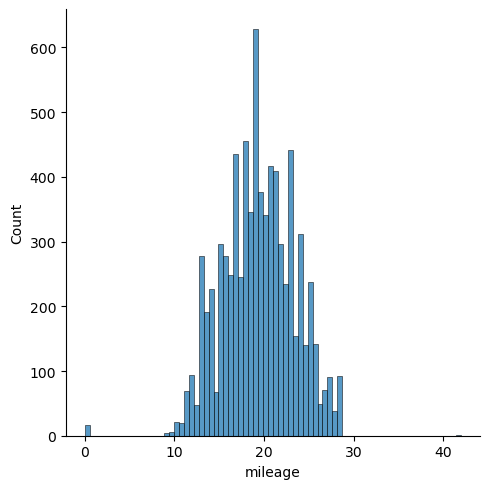

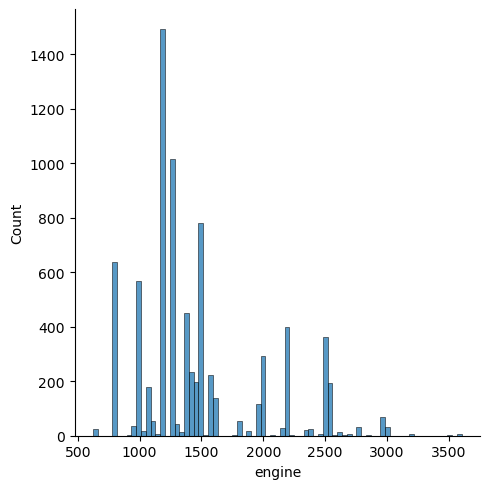

In [64]:
sns.displot(data=df, x='mileage')
sns.displot(data=df, x='engine')

Since, mileage has more values centered towards the middle we can perform mean to impute it's missing values.

Here engine is skewed towards right indicating more data points are clustered to the left. So we can perform median to impute the missing values of engine.

In [65]:
#let's fill the training set first
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

In [66]:
#let's fill the testing set with the training distribution
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

In [67]:
#check again if there are still any null values
print("X train:")
X_train[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X train:


year         0
km_driven    0
mileage      0
engine       0
dtype: int64

In [68]:
#check again for null values
print("X test:")
X_test[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X test:


year         0
km_driven    0
mileage      0
engine       0
dtype: int64

In [69]:
assert(X_train.shape[0] == y_train.shape[0])

In [70]:
assert(X_test.shape[0] == y_test.shape[0])

**Feature Scaling**

In this experiment we are performing many tests to find the best model for our use, in the dataframe it is obvious that the features that we have chosed are very large in numbers and it might later affect the computation. Hence, to avoid such issues we are scaling the features using the MinMaxScaler function.  

The MinMaxScaler function rescales the data to specified range often between 0 and 1. This ensures that all features contribute equally to the model by placing them in the same scale. This method also inproves the convergence rate and prevents dominiance of one feature over the other. 

In [71]:
from sklearn.preprocessing import StandardScaler

#predefine the selected features that we received from performing EDA
num_cols = ['year', 'km_driven', 'mileage', 'engine']

#create a MinMaxScaler object
scaler = StandardScaler()

#fit and transform the data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [72]:
y_train_encoded = pd.get_dummies(y_train)

In [73]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
y_train_encoded = y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [74]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train_encoded.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619, 4)
Shape of y_test:  (2409,)


## Step 6. Model Selection and MLFlow

1) Log your experiment to the CSIM ML flow server. 
2) Deploy the Model using ‘Models’ module of the MLflow. 
3) For the final touch, set up GitHub for CI/CD. 

In [75]:
mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th/")

os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
os.environ["LOGNAME"] = "st124984_Israt"

mlflow.set_experiment(experiment_name="st124984-a3-nipa")

<Experiment: artifact_location='mlflow-artifacts:/592544107607162718', creation_time=1743542756348, experiment_id='592544107607162718', last_update_time=1743542756348, lifecycle_stage='active', name='st124984-a3-nipa', tags={}>

In [76]:
import time

k = len(set(y))

class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha = 0.001, max_iter=5000):
        self.regularization = regularization
        self.k = int(k)
        self.n = int(n)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None
        self.losses = []
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)  

        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        correct_predictions = np.sum(y_test == y_pred)
        total_predictions = y_test.shape[0]
        return correct_predictions / total_predictions

    def precision(self, y_test, y_pred, c=0):
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_positives = np.sum((y_test != c) & (y_pred == c))
        if true_positives + false_positives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_positives)

    def recall(self, y_test, y_pred, c=0):
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_negatives = np.sum((y_test == c) & (y_pred != c))
        if true_positives + false_negatives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_negatives)

    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)

    def macro_precision(self, y_test, y_pred):
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k

    def macro_recall(self, y_test, y_pred):
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k

    def macro_f1(self, y_test, y_pred):
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k

    def weighted_precision(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)

    def weighted_recall(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)

    def weighted_f1(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)

    def classification_report(self, y_test, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                   self.recall(y_test, y_pred, c),
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                       self.macro_recall(y_test, y_pred),
                       self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                       self.weighted_recall(y_test, y_pred),
                       self.weighted_f1(y_test, y_pred)])

        return pd.DataFrame(report, index=idx, columns=cols)

In [77]:
#classes for Penalty
class RidgePenalty:
    def __init__(self, l):
        self.l = l

    def __call__(self, theta):
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        return self.l * 2 * theta

class Ridge(LogisticRegression):
    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

## Step 6.1 - Experiment

In [78]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

**Cross-validation and Experiment training**

Here we perform all the regularization methods with different parameters.

In [79]:
#Cross-validation Grid search and experiment training
regressions = ["Normal", "Ridge"]
alphas=[0.01,0.001,0.0001]
methods = ["batch","minibatch","sto"]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

#iteration of all regressions
for reg in regressions:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)
        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("+====+"*20)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("+====+"*20)
                type_of_regression = str_to_class(reg)
                model = type_of_regression(**params)  
                model.fit(X_train, y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)                

        mlflow.end_run()

mlflow.end_run()

+====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====+
Normal batch
alpha: 0.01
+====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====++====+
Loss at iteration 0 1.4598646188549116
Loss at iteration 500 15.07524855652416
Loss at iteration 1000 15.07524855652416
Loss at iteration 1500 15.075248556524155
Loss at iteration 2000 15.07524855652416
Loss at iteration 2500 15.07524855652416
Loss at iteration 3000 15.07524855652416
Loss at iteration 3500 15.07524855652416
Loss at iteration 4000 15.075248556524155
Loss at iteration 4500 15.075248556524155
Loss at iteration 5000 15.075248556524155
Loss at iteration 5500 15.075248556524153
Loss at iteration 6000 15.075248556524155
Loss at iteration 6500 15.075248556524155
Loss at iteration 7000 15.075248556524155
Loss at iteration 7500 15.075248556524159
Loss at iteration 8000 15.075248556524159
Loss at iteration 8500 15.075

## Step 7. Testing on Best Found Model

**********
Best Model:
Regularization: Ridge
Method: sto
Final Training Loss: 1.06339104134407
**********


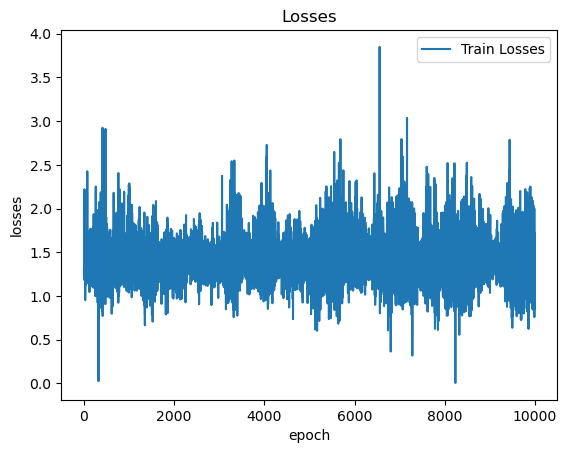

In [80]:
# Print the best model's parameters and metrics
# Plot the loss graph and graph the best model
print("*" * 10)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("*" * 10)
best_model.plot()
plt.show()

In [81]:
from sklearn.metrics import classification_report as sklearn_classification_report

# As the best_model is already found and based on the previous code we can use the best model to predict
yhat = best_model.predict(X_test)

# Classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("+===+" * 4, "Custom Classification report", "+===+" * 4)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("+===+" * 4, "Sklearn's Classification report", "+===+" * 4)
print(sklearn_report)

+===++===++===++===+ Custom Classification report +===++===++===++===+
         precision    recall  f1-score
0         0.999285  0.602327  0.751613
1         0.061713  0.924528  0.115702
2         0.039801  0.235294  0.068085
3              0.0       0.0  0.000000
accuracy                      0.603985
macro       0.2752  0.440537  0.233850
weighted  0.964701  0.603985  0.727663


+===++===++===++===+ Sklearn's Classification report +===++===++===++===+
              precision    recall  f1-score   support

           0       1.00      0.60      0.75      2321
           1       0.06      0.92      0.12        53
           2       0.04      0.24      0.07        34
           3       0.00      0.00      0.00         1

    accuracy                           0.60      2409
   macro avg       0.28      0.44      0.23      2409
weighted avg       0.96      0.60      0.73      2409



## Step 8. Testing and Inference

In this instance we create a model for the new set and compare the sample data output with the old prediction model.

In [86]:
import cloudpickle

# save the model to disk
cloudpickle.dump(best_model, open('model/carprice_prediction_a3.model', 'wb'))

In [87]:
# save the scaler model to disk
cloudpickle.dump(scaler, open('model/carprice_prediction_a3_scaler.model', 'wb'))

In [88]:
# load and test 
load_model = cloudpickle.load(open('model/carprice_prediction_a3.model', 'rb'))

In [89]:
import mlflow

client = mlflow.MlflowClient()
models = client.search_registered_models()
for model in models:
    print(model.name)


In [90]:
import mlflow

experiment_name = "st124984-a3-nipa"  # Replace with your actual experiment name
client = mlflow.MlflowClient()

experiment = client.get_experiment_by_name(experiment_name)
if experiment:
    runs = client.search_runs(experiment.experiment_id)
    for run in runs:
        print(f"Run ID: {run.info.run_id}, Status: {run.info.status}")
else:
    print("Experiment not found!")


Run ID: 64dc5d188ad04f19847c7ebf8d76b097, Status: FINISHED
Run ID: 2a530ba12e91404799ee80d6a170df38, Status: FINISHED
Run ID: 755ca9b9a2864de19ad777e685f90b5b, Status: FINISHED
Run ID: 8735888b5666489790d1ff72531e45b2, Status: FINISHED
Run ID: 646d4dd174e748c8a904b5ce3fbac324, Status: FINISHED
Run ID: 50e291efc9f04dd6aabd88dd89dd4ac8, Status: FINISHED
Run ID: 764b58f7e6cd42b28c6b5295c8a0a80f, Status: FINISHED
Run ID: 18cb40b59e1e46129532ab9711acdc78, Status: FINISHED
Run ID: ba242544ecde47a08f5a97d3b477c789, Status: FINISHED
Run ID: 9f55cec1868c4981a439664ec670b977, Status: FINISHED
Run ID: a94cc5965e6d4a79a193fb0fe8275729, Status: FINISHED
Run ID: 684fa93885d14ea1b86f6d0a8369b9f6, Status: FINISHED
Run ID: 0e123d43a5c4420da9a1bafb23db4d78, Status: FINISHED
Run ID: 1508507862b64136a8ea59bfddc1759e, Status: FINISHED
Run ID: 743e0466ffa74882b8b7d2cef512506f, Status: FINISHED
Run ID: ae833685add44692afa2dcdb9aeb5ed6, Status: FINISHED
Run ID: 9c103b621cf14d329805e103206f8d8f, Status: FINISH

In [91]:
client = mlflow.tracking.MlflowClient()
experiments = client.search_experiments()

for exp in experiments:
    print(f"Experiment ID: {exp.experiment_id}, Name: {exp.name}")


Experiment ID: 224284947186939389, Name: st125367-a3-v2
Experiment ID: 530753955686245917, Name: st125171-a3
Experiment ID: 116411965365937607, Name: st124879-a3
Experiment ID: 108142278040114185, Name: st_124895-a3
Experiment ID: 742878610382977256, Name: st124642-a3
Experiment ID: 625142246360092316, Name: st125675-a3
Experiment ID: 190688416226121435, Name: st124963-a3
Experiment ID: 592544107607162718, Name: st124984-a3-nipa
Experiment ID: 983504678359630736, Name: st125713-a3
Experiment ID: 951198864231561543, Name: st125041-A3
Experiment ID: 426914527460299405, Name: st124090-a3
Experiment ID: 311599177009085299, Name: st125563-a3
Experiment ID: 403282937089341554, Name: st125168--a3
Experiment ID: 146317551587354137, Name: ST124876-a3V.1.1
Experiment ID: 821047045305364446, Name: ST124876-a3-mockup
Experiment ID: 892046307439781005, Name: st124957-a3-v1.1
Experiment ID: 371070989746783443, Name: st125098-a3
Experiment ID: 223007358482792475, Name: st124783-a3
Experiment ID: 4826

In [92]:
experiment_id = "592544107607162718"  # Your experiment ID for st124984-a3-nipa
runs = client.search_runs(experiment_id)

for run in runs:
    print(f"Run ID: {run.info.run_id}, Status: {run.info.status}, Artifacts: {run.info.artifact_uri}")


Run ID: 64dc5d188ad04f19847c7ebf8d76b097, Status: FINISHED, Artifacts: mlflow-artifacts:/592544107607162718/64dc5d188ad04f19847c7ebf8d76b097/artifacts
Run ID: 2a530ba12e91404799ee80d6a170df38, Status: FINISHED, Artifacts: mlflow-artifacts:/592544107607162718/2a530ba12e91404799ee80d6a170df38/artifacts
Run ID: 755ca9b9a2864de19ad777e685f90b5b, Status: FINISHED, Artifacts: mlflow-artifacts:/592544107607162718/755ca9b9a2864de19ad777e685f90b5b/artifacts
Run ID: 8735888b5666489790d1ff72531e45b2, Status: FINISHED, Artifacts: mlflow-artifacts:/592544107607162718/8735888b5666489790d1ff72531e45b2/artifacts
Run ID: 646d4dd174e748c8a904b5ce3fbac324, Status: FINISHED, Artifacts: mlflow-artifacts:/592544107607162718/646d4dd174e748c8a904b5ce3fbac324/artifacts
Run ID: 50e291efc9f04dd6aabd88dd89dd4ac8, Status: FINISHED, Artifacts: mlflow-artifacts:/592544107607162718/50e291efc9f04dd6aabd88dd89dd4ac8/artifacts
Run ID: 764b58f7e6cd42b28c6b5295c8a0a80f, Status: FINISHED, Artifacts: mlflow-artifacts:/59254

In [93]:
import mlflow

client = mlflow.MlflowClient()

run_ids = [
    "c4e1773848ea446fb0d43487b0bab3d9",
    "1765a01e549a4771965389c0556fd740",
    "6fa400b8bc9048cf9f573e3fdb8c5776",
    "4827f003d515499ea6c896084278c871",
    "0951da75acf0464d87053e5879472a7f",
    "a5786832da244facb2174d223ec0c183",
    "53d884972b0f4e4bb41550ff94f776f7",
    "dfec11d6fbe745029d47b0b81bd917ed",
    "b923d09977114b8f81354102f0f89385",
    "b9c58123afbb4fc2bcaf84d06009dd8b",
    "8724e03fd19642a1909b1b71427aaad7",
    "0e3be2a090a042d29d49c034698bfa11",
    "0273832c4e51402fb95d5f0c9433edeb",
    "30e6683f5ba042e899155d8eb0b4023e",
    "d14f0c828db84e0088780c9e61a1e7ea",
    "33f933e534ce4b408ec11fbac59d1ae1",
    "c757967b386f4bef8169a51df0fdaa60",
    "840fa95609434c14b47f7cda5aa544a5",
    "8f915a1c0e4c40f3b6888ca7f5b908ca",
    "70c96408a09b460cbb7e43934ec24a10",
    "fb17a5a0089f4452b38f8a193a4c2ce5",
    "5cf746848f3f4423be23b24365b78e44",
    "051eb39a46c04cebb4b51af723b377a4",
    "da6fbb634f55432bb37803b0eac3cfe3"
]

print("Comparing Run Metrics...\n")
best_run = None
best_metric = None
best_run_id = None

for run_id in run_ids:
    run = client.get_run(run_id)
    metrics = run.data.metrics
    print(f"Run ID: {run_id}, Metrics: {metrics}")

    # Example: If your metric is accuracy, change `your_metric_name_here`
    # Change this condition based on your metric type (higher or lower is better)
    metric_name = "accuracy"  # Change to your relevant metric name
    if metric_name in metrics:
        if best_metric is None or metrics[metric_name] > best_metric:  # Adjust for min/max metric
            best_metric = metrics[metric_name]
            best_run = run
            best_run_id = run_id

print("\nBest Run:")
print(f"Run ID: {best_run_id}, Metrics: {best_run.data.metrics}")


Comparing Run Metrics...

Run ID: c4e1773848ea446fb0d43487b0bab3d9, Metrics: {'class_0_precision': 0.8843085106382979, 'class_0_f1': 0.43280182232346254, 'class_2_f1': 0.0, 'accuracy': 0.2760481527604815, 'class_3_f1': 0.0, 'class_3_precision': 0.0, 'class_2_recall': 0.0, 'class_1_f1': 0.0, 'class_0_recall': 0.28651443343386473, 'class_1_precision': 0.0, 'class_3_recall': 0.0, 'class_1_recall': 0.0, 'class_2_precision': 0.0}
Run ID: 1765a01e549a4771965389c0556fd740, Metrics: {'class_0_precision': 1.0, 'class_0_f1': 0.7337697763229678, 'class_2_f1': 0.06101694915254237, 'accuracy': 0.5774180157741802, 'class_3_f1': 0.0, 'class_3_precision': 0.0, 'class_2_recall': 0.2647058823529412, 'class_1_f1': 0.09343434343434344, 'class_0_recall': 0.5794915984489444, 'class_1_precision': 0.05006765899864682, 'class_3_recall': 0.0, 'class_1_recall': 0.6981132075471698, 'class_2_precision': 0.034482758620689655}
Run ID: 6fa400b8bc9048cf9f573e3fdb8c5776, Metrics: {'class_0_precision': 1.0, 'class_0_f1'

In [94]:
best_run_id = "6fa400b8bc9048cf9f573e3fdb8c5776"  # Replace with your chosen run
model_name = "st124984-a3-nipa"

model_uri = f"runs:/{best_run_id}/model"
mlflow.register_model(model_uri=model_uri, name=model_name)


Registered model 'st124984-a3-nipa' already exists. Creating a new version of this model...
2025/04/06 03:29:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st124984-a3-nipa, version 2
Created version '2' of model 'st124984-a3-nipa'.


<ModelVersion: aliases=[], creation_timestamp=1743910556455, current_stage='None', description='', last_updated_timestamp=1743910556455, name='st124984-a3-nipa', run_id='6fa400b8bc9048cf9f573e3fdb8c5776', run_link='', source='mlflow-artifacts:/592544107607162718/6fa400b8bc9048cf9f573e3fdb8c5776/artifacts/model', status='READY', status_message=None, tags={}, user_id='', version='2'>

In [95]:
models = client.search_registered_models()
for model in models:
    print(f"Model Name: {model.name}")


In [109]:
# Load registered model from mlflow server
model_name = "st124984-a3-nipa"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

In [114]:
import mlflow

client = mlflow.MlflowClient()

model_name = "st124984-a3-nipa"  # 
model_version = 1  

# Transition the model to 'Staging'
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage="Staging"
)

print(f"Model {model_name} version {model_version} is now in Staging.")


Model st124984-a3-nipa version 1 is now in Staging.


In [110]:
# Create a new DataFrame
import pandas as pd
pred_selling_price = model.predict(pd.DataFrame(X_test))
pred_selling_price[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [112]:
#step 3: predict on a sample
sample = df[['year', 'km_driven', 'mileage', 'engine', 'selling_price']].loc[30]
sample

year              2017.0
km_driven        70000.0
mileage             24.3
engine            1248.0
selling_price        0.0
Name: 30, dtype: Float64

**Prediction of Car price using new model**

In [113]:
# Define our own sample of car
sample_np_new = pd.DataFrame([[2017, 70000, 24.3, 1248]], columns=['year', 'km_driven', 'mileage', 'engine'])

answer_new = (model.predict(sample_np_new))[0]
print(f"New Predicted selling price classification: {answer_new}")

New Predicted selling price classification: 0


# Report

## Summary

For this project, we created a 4-class classification problem by binning the selling price column. Then, we defined a class `LogisticRegression` where we made functions to calculate recall, precision, f1-score and accuracy. Along with this, we created functions to calculate macro and weighted recall, precision and f1-score. We also added Ridge penalty with an option to either use it or not use it.<br>
Then, we created our own custom classification report function and compared it with the sklearn's classification report. <br>
Moving on, we setup our experiment with mlflow and logged our metrics. Through that, we compared the scores and registered the best model and loaded it to predict the outcome using our test set. <br>
<br>
My model's overall accuracy came to be around `0.58` with f1-score of `0.73, 0.16, 0.00, 0.00 for class 0, 1, 2 and 3 respectively.